In [52]:
%matplotlib qt5
import mne
import numpy as np
import pandas as pd
mne.__version__

'0.18.2'

In [53]:
data = pd.read_csv("/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/110_eeg.csv", index_col=0)

In [59]:
channel_names = [
    'Fp1',
    'Fp2',
    'F3',
    'F4',
    'F7',
    'F8',
    'C3',
    'C4',
    'P3',
    'P4',
    'O1',
    'O2',
    'T3',
    'T4',
    'T5',
    'T6',
    'Fz',
    'Cz',
    'Pz'
]

sfreq = 250

info = mne.create_info(channel_names, sfreq, ch_types="eeg")

raw = mne.io.RawArray(data.transpose(), info)

Creating RawArray with float64 data, n_channels=19, n_times=58820
    Range : 0 ... 58819 =      0.000 ...   235.276 secs
Ready.


In [60]:
#fucking beautiful
print(raw.plot())

Figure(640x480)


['EGI_256', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'biosemi128', 'biosemi16', 'biosemi160', 'biosemi256', 'biosemi32', 'biosemi64', 'easycap-M1', 'easycap-M10', 'mgh60', 'mgh70', 'standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed']


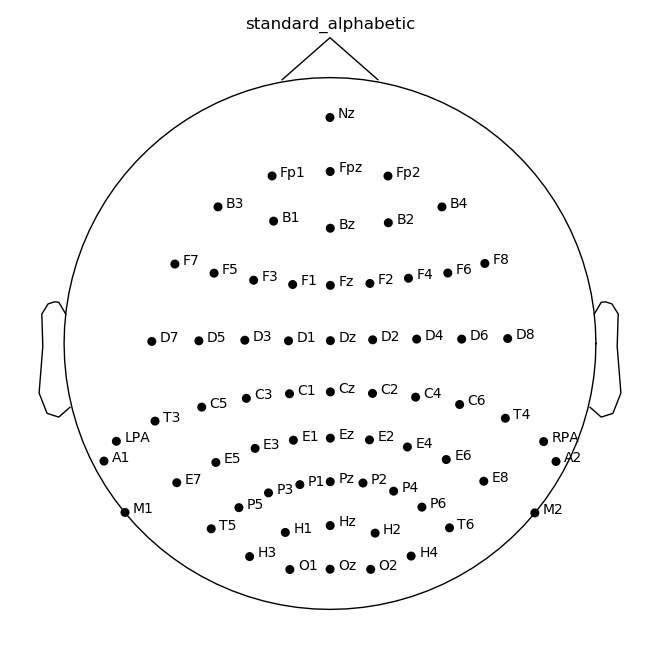

In [61]:
print(mne.channels.get_builtin_montages())
montage = mne.channels.read_montage("standard_alphabetic")
montage.plot()

In [62]:
raw.info["ch_names"]

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'F7',
 'F8',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz']

In [63]:
raw.set_montage(montage)

<RawArray  |  None, n_channels x n_times : 19 x 58820 (235.3 sec), ~8.6 MB, data loaded>

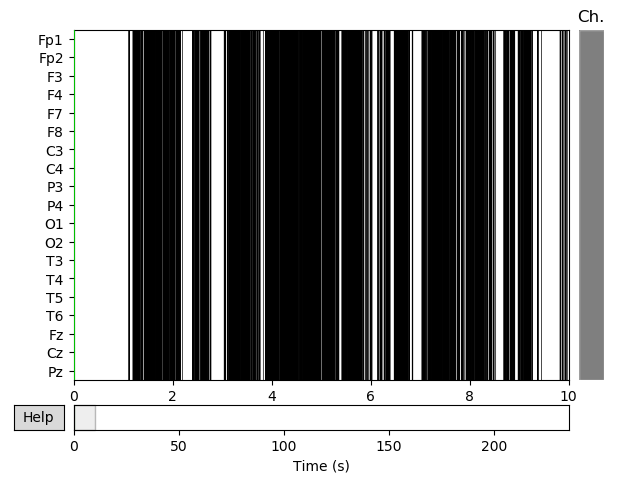

In [93]:
raw.plot()

In [102]:
event_data = pd.read_csv("/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy/p300/1/110_evt.csv", index_col=False, usecols=[1], skiprows=[0], names=["stim"])
event_data

,stim
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [111]:
sfreq = 250

event_info = mne.create_info(['stim'], sfreq, ch_types="stim")

events = mne.io.RawArray(event_data.transpose(), event_info)

Creating RawArray with float64 data, n_channels=1, n_times=58820
    Range : 0 ... 58819 =      0.000 ...   235.276 secs
Ready.


In [112]:
mne_events = mne.find_events(events, consecutive=True)

233 events found
Event IDs: [1 2]


In [113]:
import matplotlib.pyplot as plt
plt.plot(mne_events.data[1])

NotImplementedError: multi-dimensional sub-views are not implemented